In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from math import sqrt
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
consumer_key= 'IzVoGBrbWKsia2vPl9ynUFnJq'
consumer_secret= 'uppzzAcV5r9qjpXOQWtxCDoK6M2aYkR2m7uc0eU77GJQVzftU8'
access_token= '541767544-etWnFjn40y6kvbQp7qu1su1c7XHQz8qXofAGA9Dv'
access_token_secret= 'Z69D4xmI0OdmwMEmD6yfwUv48ppWD0pYDgz15Fu3zuG1N'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


NameError: ignored

In [ ]:
!pip3 install lxml==3.5.0
!pip3 install pyquery==1.2.10
!pip install GetOldTweets3

In [3]:
!pip install emoji
!pip install vaderSentiment

import nltk
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

!pip install NRCLex


     |████████████████████████████████| 175 kB 4.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=5ef1b94d14c24b12d06244f3baad7c94bfc76291009b5bdcd531f1585feb71d6
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 125 kB 3.9 MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 396 kB 2.7 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=b82b522d9c1b0eda2b907c4f1d1580c642e7edd0b750f79d676fa139acfe024c
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
 
def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    text = emoji.demojize(text)
    # remove HTML tags
    text = re.sub(r'<.*?>', '', str(text))
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    word_tokens = word_tokenize(text) 
    review = [w for w in word_tokens if not w in stop_words] 
    return (' '.join(review))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import GetOldTweets3 as got3
import emoji
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex

def sentiment_scores(sentence): 
  

    sid_obj = SentimentIntensityAnalyzer() 

    sentiment_dict = sid_obj.polarity_scores(sentence) 

    if sentiment_dict['compound'] >= 0.05 : 
        return "positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "negative"
  
    else : 
        return "neutral"

def emotiondetector(text):
  text_object = NRCLex(text)
  emotions = {
  'fear' : 0,
  'anger' : 0,
  'anticip' : 0,
  'trust' : 0,
  'surprise' : 0,
  'positive' : 0,
  'negative' : 0,
  'sadness' : 0,
  'disgust' : 0,
  'joy': 0,

  }
  

  emo = []

  for key in text_object.affect_frequencies.keys():
    for item in text_object.top_emotions:
        if key in item:
          emotions[key] = 1
  for key in sorted(emotions):
      emo.append(emotions[key])
  
  return emo

filename = '/content/drive/My Drive/sentimental/result_jul30.csv'

csvFile = open(filename, 'w')

csvWriter = csv.writer(csvFile)
csvWriter.writerow(["created at", "text", "hashtags", "cleaned", "cleanedhash","location", "keyword","polarity", 'anger', 'anticip', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust'])
csvFile.close()

csvFile = open(filename, 'a')
csvWriter = csv.writer(csvFile)
max_tweets = 5
keywords = [ 'corona','virus','coronavirus', 'covid19', 'social', 'job' , 'loss' , 'jobloss', 'migrant' , 'treatment' , 'hospital', 'health', 'mask', 'lockdown', 'curfew']
locations = {"chennai": "13.08, 80.27", "bangalore": "12.97, 77.59", "hyderabad": "17.38, 78.48", "mumbai": "19.07, 72.87", "delhi": "28.70, 77.10", "kolkata": "22.57, 88.36"}
datesince = "2020-07-15"
dateuntil = "2020-07-30"


for keyword in keywords:
  for place in locations:
    tweetCriteria = got3.manager.TweetCriteria().setSince(datesince).setUntil(dateuntil).setQuerySearch(keyword).setMaxTweets(max_tweets).setNear(locations[place]).setWithin("100km").setLang('en').setEmoji('unicode')

    for i in range(max_tweets):
        try: 
          tweet = got3.manager.TweetManager.getTweets(tweetCriteria)[i]
        except:
          pass
        ctxt = clean_text(tweet.text)
        chsh = clean_text(tweet.hashtags)
        ctxthsh = ctxt+chsh
        pol = sentiment_scores(ctxthsh)
        emotions = emotiondetector(ctxthsh)
        csvWriter.writerow([tweet.date,tweet.text, chsh , ctxt, ctxthsh  ,place ,keyword,pol,emotions[0],emotions[1],emotions[2],emotions[3],emotions[4],emotions[5],emotions[6],emotions[7],emotions[8],emotions[9]])


csvFile.close()    
d = pd.read_csv(filename, keep_default_na = False)
d.drop_duplicates(subset = ["created at"], inplace = True, keep = 'first')
d.to_csv(filename, index = False)

In [4]:
files = [
         "/content/drive/My Drive/sentimental/prelockdown.csv",
         "/content/drive/My Drive/sentimental/lockdown1.csv",
         "/content/drive/My Drive/sentimental/lockdown2.csv",
         "/content/drive/My Drive/sentimental/lockdown3.csv",
         "/content/drive/My Drive/sentimental/lockdown4.csv",
         "/content/drive/My Drive/sentimental/unlock1.csv",
         "/content/drive/My Drive/sentimental/unlock2.csv",

]

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/sentimental/result_feb15.csv")
df2 = pd.read_csv("/content/drive/My Drive/sentimental/result_feb29.csv")
df3 = pd.read_csv("/content/drive/My Drive/sentimental/result_mar15.csv")

list_of_dataframes = []
list_of_dataframes.append(df1)
list_of_dataframes.append(df2)
list_of_dataframes.append(df3)

finaldf = pd.concat(list_of_dataframes)
finaldf.to_csv("/content/drive/My Drive/sentimental/prelockdown.csv", index = False)


In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/sentimental/result_mar30.csv")
df2 = pd.read_csv("/content/drive/My Drive/sentimental/result_apr15.csv")

list_of_dataframes = []
list_of_dataframes.append(df1)
list_of_dataframes.append(df2)


finaldf = pd.concat(list_of_dataframes)
finaldf.to_csv("/content/drive/My Drive/sentimental/lockdown1.csv", index = False)

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/sentimental/result_apr30.csv")
df2 = pd.read_csv("/content/drive/My Drive/sentimental/result_may15.csv")


ist_of_dataframes = []
list_of_dataframes.append(df1)
list_of_dataframes.append(df2)


finaldf = pd.concat(list_of_dataframes)
finaldf.to_csv("/content/drive/My Drive/sentimental/lockdown2.csv", index = False)

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/sentimental/result_may30.csv")
df2 = pd.read_csv("/content/drive/My Drive/sentimental/result_jun15.csv")

ist_of_dataframes = []
list_of_dataframes.append(df1)
list_of_dataframes.append(df2)


finaldf = pd.concat(list_of_dataframes)
finaldf.to_csv("/content/drive/My Drive/sentimental/lockdown3.csv", index = False)

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/sentimental/result_jun30.csv")


df1.to_csv("/content/drive/My Drive/sentimental/lockdown4.csv", index = False)

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/sentimental/result_jul15.csv")


df1.to_csv("/content/drive/My Drive/sentimental/unlock1.csv", index = False)

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/sentimental/result_jul30.csv")


df1.to_csv("/content/drive/My Drive/sentimental/unlock2.csv", index = False)

In [5]:
files = [
         "/content/drive/My Drive/sentimental/prelockdown.csv",
         "/content/drive/My Drive/sentimental/lockdown1.csv",
         "/content/drive/My Drive/sentimental/lockdown2.csv",
         "/content/drive/My Drive/sentimental/lockdown3.csv",
         "/content/drive/My Drive/sentimental/lockdown4.csv",
         "/content/drive/My Drive/sentimental/unlock1.csv",
         "/content/drive/My Drive/sentimental/unlock2.csv",

]

In [ ]:
csv_file_list = [files[5],files[6]]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)
merged_df.to_csv("/content/drive/My Drive/sentimental/unlock.csv", index = False)


In [ ]:

csv_file_list = [files[1],files[2],files[3],files[4]]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)
merged_df.to_csv("/content/drive/My Drive/sentimental/lockdown.csv", index = False)

csv_file_list = [files[5],files[6]]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)
merged_df.to_csv("/content/drive/My Drive/sentimental/unlock.csv", index = False)




In [ ]:
files = [
         "/content/drive/My Drive/sentimental/prelockdown.csv",
         "/content/drive/My Drive/sentimental/lockdown1.csv",
         "/content/drive/My Drive/sentimental/lockdown2.csv",
         "/content/drive/My Drive/sentimental/lockdown3.csv",
         "/content/drive/My Drive/sentimental/lockdown4.csv",
         "/content/drive/My Drive/sentimental/unlock1.csv",
         "/content/drive/My Drive/sentimental/unlock2.csv",
         "/content/drive/My Drive/sentimental/lockdown.csv",
         "/content/drive/My Drive/sentimental/unlock.csv"


]

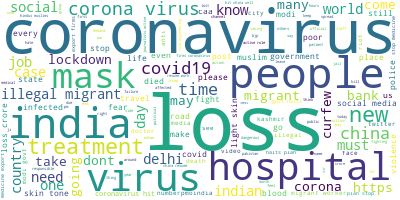

In [6]:
from wordcloud import WordCloud
import re
df = pd.read_csv(files[0])
df = df[df.polarity.eq('negative')]
long_string = ','.join(list(df['cleaned'].values))
long_string = long_string.replace('amp', "" )

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

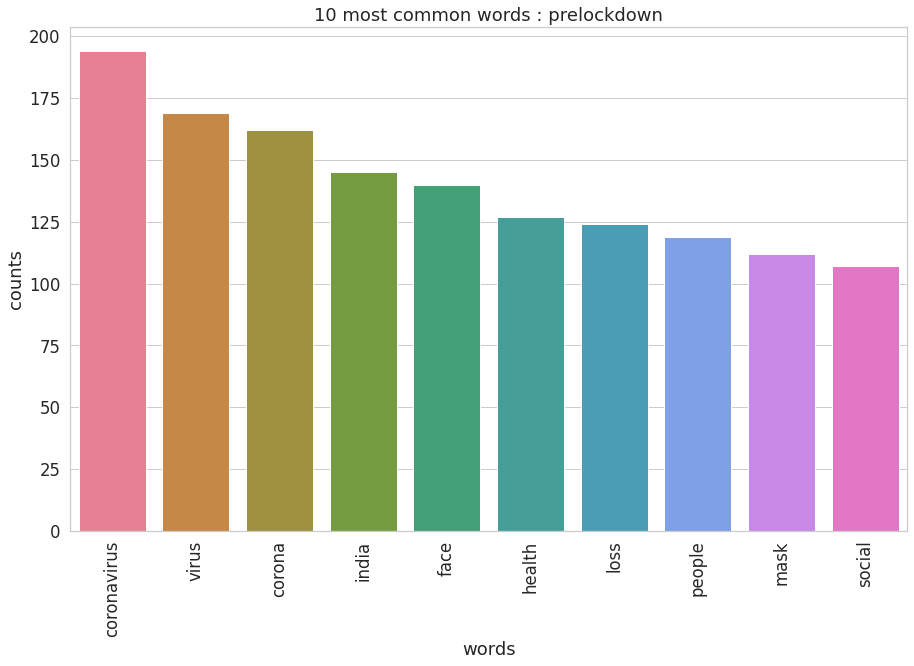

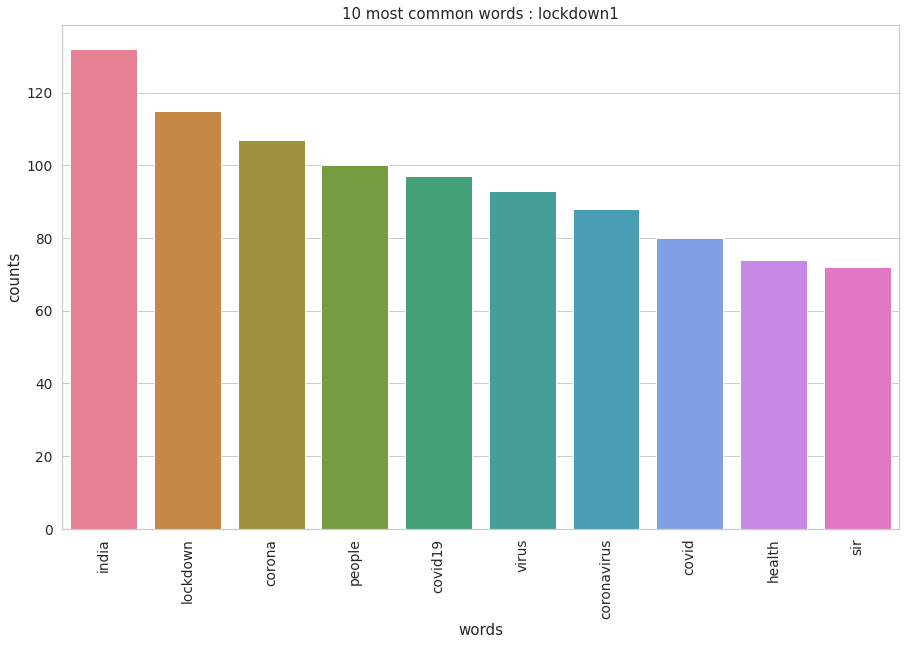

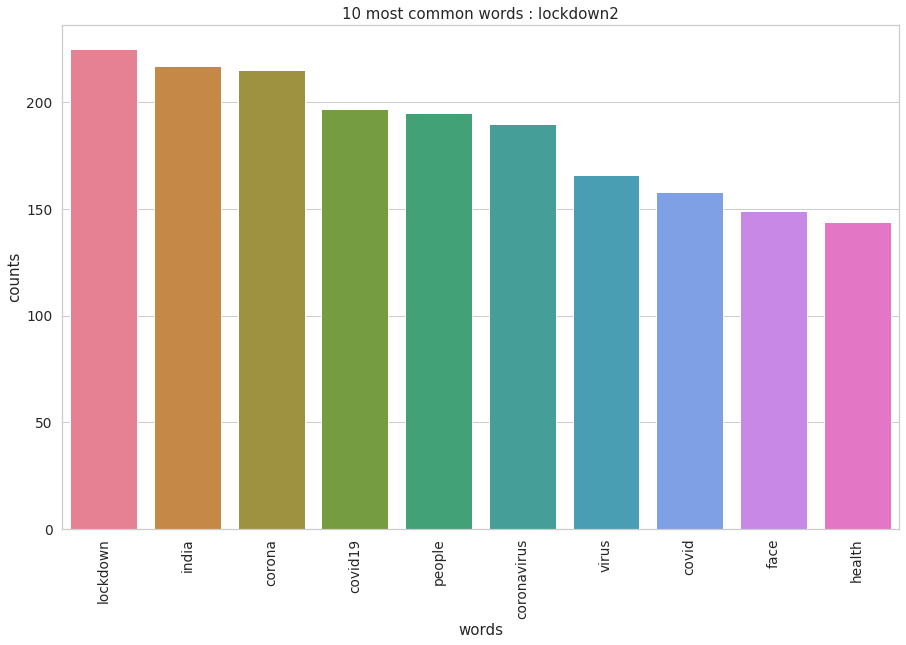

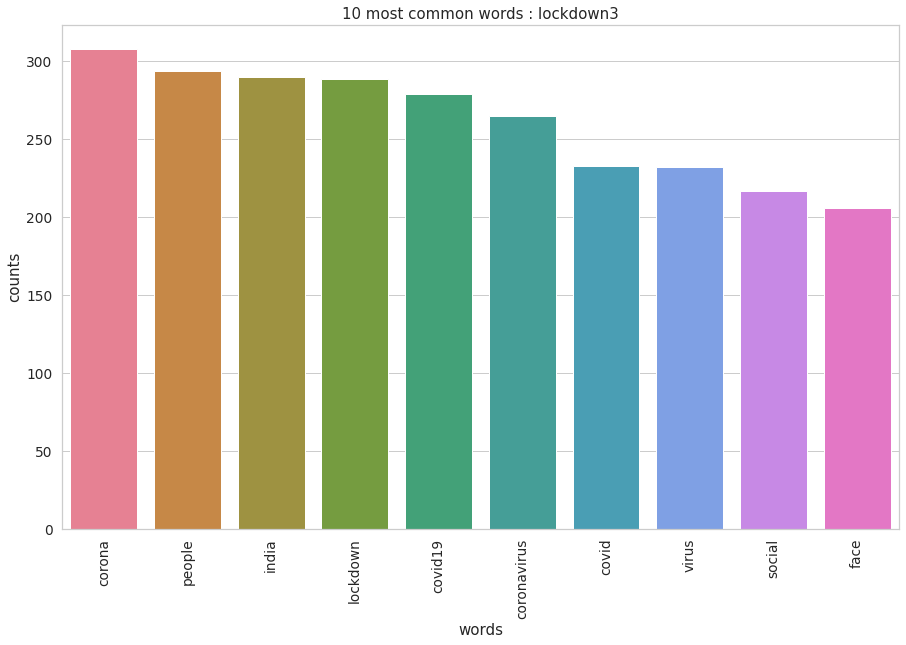

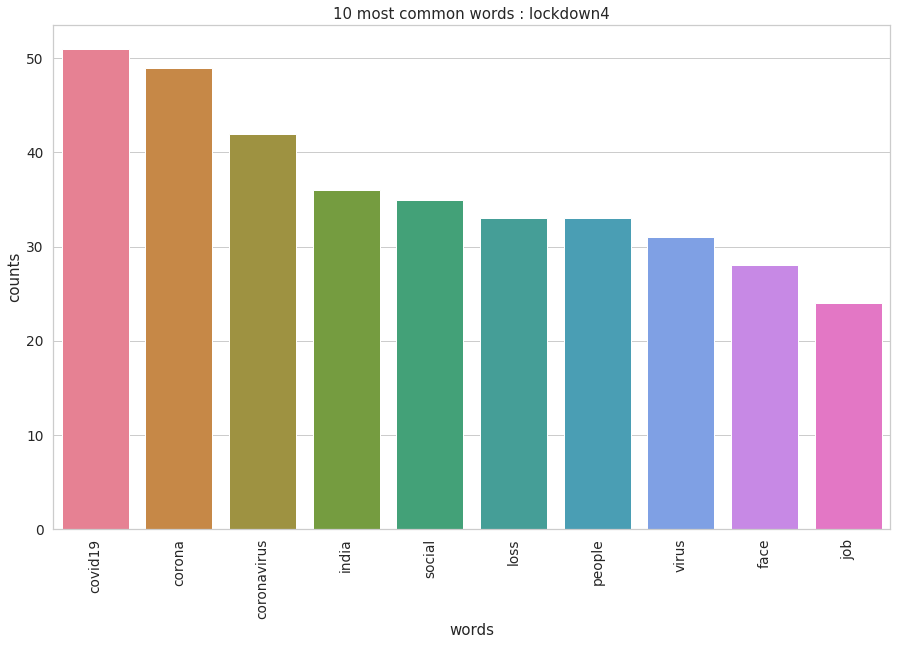

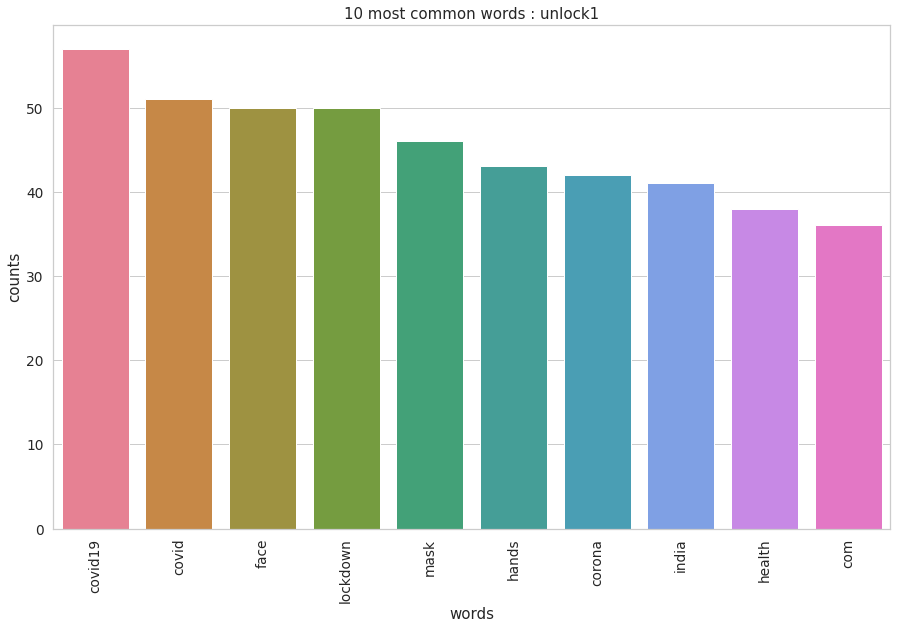

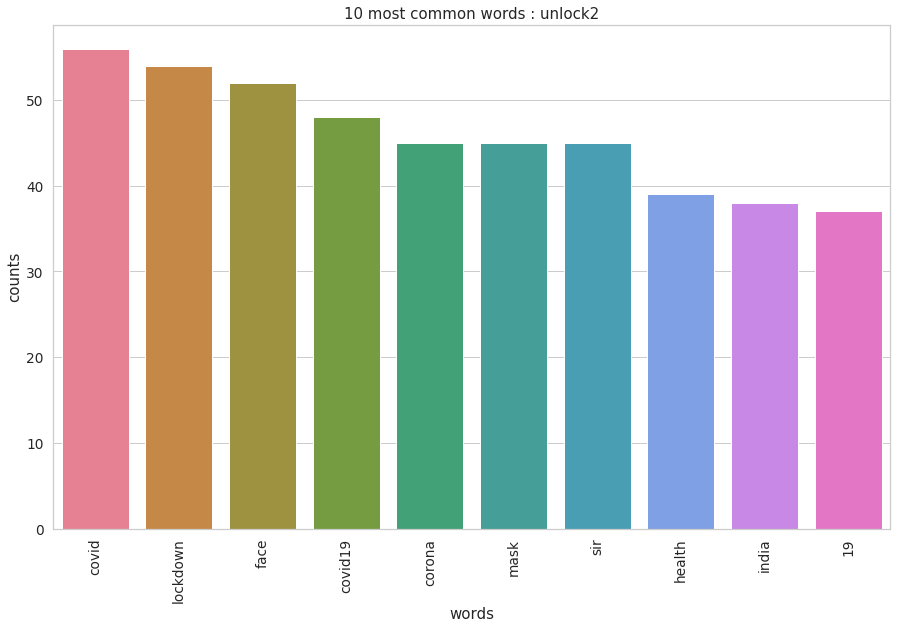

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer,file):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))

    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]

    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    period = file.split('/')[-1].split('.')[0]
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words : ' + period + '')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

for file in files:
  # Initialise the count vectorizer with the English stop words
  count_vectorizer = CountVectorizer(stop_words='english')
  # Fit and transform the processed titles
  df = pd.read_csv(file)
  remove_words = ['amp', 'https']
  pat = r'\b(?:{})\b'.format('|'.join(remove_words))
  df['cleanedhash'] = df['cleanedhash'].str.replace(pat, '')
  count_data = count_vectorizer.fit_transform(df['cleanedhash'])

  # Visualise the 10 most common words
  plot_10_most_common_words(count_data, count_vectorizer,file)

In [8]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

for file in files:
  # Initialise the count vectorizer with the English stop words
  count_vectorizer = CountVectorizer(stop_words='english')
  # Fit and transform the processed titles
  df = pd.read_csv(file)
  df= df[df.location.isin(['delhi','mumbai','kolkata'])]
  remove_words = ['amp', 'https']
  pat = r'\b(?:{})\b'.format('|'.join(remove_words))
  df['cleanedhash'] = df['cleanedhash'].str.replace(pat, '')
  count_data = count_vectorizer.fit_transform(df['cleanedhash'])

   # Tweak the two parameters below
  number_topics = 5
  number_words = 10
  # Create and fit the LDA model
  lda = LDA(n_components=number_topics, n_jobs=-1)
  lda.fit(count_data)
  # Print the topics found by the LDA model
  period = file.split('/')[-1].split('.')[0]
  print("Topics found via LDA: " + period + " North India")
  print_topics(lda, count_vectorizer, number_words)

Topics found via LDA: prelockdown North India

Topic #0:
covid19 coronavirus cases lockdown china treatment mumbai loss com hospital

Topic #1:
india face loss health social com hospital virus bank hands

Topic #2:
virus mask corona india people com stop like health www

Topic #3:
coronavirus corona virus face india health people smiling treatment world

Topic #4:
mask corona virus good loss social curfew face people migrant
Topics found via LDA: lockdown1 North India

Topic #0:
mask lockdown loss people coronavirus workers social travel best govt

Topic #1:
sir hospital corona job coronavirus ji treatment home india face

Topic #2:
india job sir people health virus home like corona lockdown

Topic #3:
india treatment curfew help covid 19 corona coronavirus pm covid19

Topic #4:
corona lockdown coronavirus health covid19 hands virus world people covid
Topics found via LDA: lockdown2 North India

Topic #0:
lockdown curfew people police covid19 india like com face hospital

Topic #1:
han

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer,file):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))

    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    count_dict.pop(0)
    period = file.split('/')[-1].split('.')[0]
    print('10 most common hashtags : ' + period + '')
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    for word,count in count_dict:
      print(str(word)+" "+str(count))
    # x_pos = np.arange(len(words)) 
    # period = file.split('/')[-1].split('.')[0]
    # plt.figure(2, figsize=(15, 15/1.6180))
    # plt.subplot(title='10 most common hashtags : ' + period + '')
    # sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    # sns.barplot(x_pos, counts, palette='husl')
    # plt.xticks(x_pos, words, rotation=90) 
    # plt.xlabel('words')
    # plt.ylabel('counts')
    # plt.show()

for file in files:
  # Initialise the count vectorizer with the English stop words
  count_vectorizer = CountVectorizer(stop_words='english')
  # Fit and transform the processed titles
  df = pd.read_csv(file)
  df.dropna()
  remove_words = ['amp', 'https','nan']
  pat = r'\b(?:{})\b'.format('|'.join(remove_words))
  df['hashtags'] = df['hashtags'].str.replace(pat, '')
  df['hashtags'] = df['hashtags'].str.encode('ascii', 'ignore').str.decode('ascii')

  count_data = count_vectorizer.fit_transform(df['hashtags'].values.astype('U'))

  # Visualise the 10 most common words
  plot_10_most_common_words(count_data, count_vectorizer,file)

10 most common hashtags : prelockdown
coronavirus 80.0
covid19 61.0
corona 26.0
covid 22.0
covid2019 15.0
coronavirusoutbreak 14.0
china 11.0
coronavirusindia 11.0
coronavirusupdates 10.0
10 most common hashtags : lockdown1
covid19 52.0
coronavirus 28.0
covid 23.0
lockdown 19.0
corona 18.0
india 18.0
indiafightscorona 13.0
stayhome 12.0
19 10.0
10 most common hashtags : lockdown2
covid19 107.0
coronavirus 68.0
covid 47.0
corona 40.0
lockdown 36.0
stayhome 32.0
india 29.0
19 20.0
indiafightscorona 17.0
10 most common hashtags : lockdown3
covid19 154.0
coronavirus 102.0
covid 66.0
corona 47.0
lockdown 44.0
india 34.0
stayhome 34.0
19 31.0
jobloss 27.0
10 most common hashtags : lockdown4
covid19 27.0
coronavirus 17.0
corona 6.0
tiktok 6.0
tiktokbanindia 6.0
lockdownextension 5.0
unlock2 5.0
chineseapps 4.0
stayhome 4.0
10 most common hashtags : unlock1
covid19 37.0
coronavirus 15.0
covid 12.0
19 10.0
india 5.0
aatmanirbharbharat 4.0
breatheintotheshadows 4.0
hyderabad 4.0
lockdown 4.0
10 

In [9]:
weekfiles = ["/content/drive/My Drive/sentimental/result_feb15.csv",
"/content/drive/My Drive/sentimental/result_feb29.csv",
"/content/drive/My Drive/sentimental/result_mar15.csv",
"/content/drive/My Drive/sentimental/result_mar30.csv",
"/content/drive/My Drive/sentimental/result_apr15.csv",
"/content/drive/My Drive/sentimental/result_apr30.csv",
"/content/drive/My Drive/sentimental/result_may15.csv",
"/content/drive/My Drive/sentimental/result_may30.csv",
"/content/drive/My Drive/sentimental/result_jun15.csv",
"/content/drive/My Drive/sentimental/result_jun30.csv",
"/content/drive/My Drive/sentimental/result_jul15.csv",
"/content/drive/My Drive/sentimental/result_jul30.csv"]

In [10]:
emotions = {

  'fear' : [],
  'anger' : [],
  'anticip' : [],
  'trust' : [],
  'surprise' : [],
  'positive' : [],
  'negative' : [],
  'sadness' : [],
  'disgust' : [],
  'joy': [],

}


for file in range(len(weekfiles)):
  df = pd.read_csv(weekfiles[file])
  df = df[df.location.isin(['delhi', 'mumbai', 'kolkata'])]
  for key in emotions.keys():

      emotions[key].append(len(df[df[key] == 1]))
    

  


In [11]:
emotions['week'] = [*range(1,13)]

In [12]:
emotions

{'anger': [44, 27, 27, 35, 40, 27, 36, 17, 38, 20, 28, 30],
 'anticip': [37, 24, 32, 37, 33, 28, 29, 18, 34, 17, 29, 21],
 'disgust': [45, 49, 43, 57, 56, 37, 51, 14, 52, 27, 44, 39],
 'fear': [34, 42, 37, 36, 44, 35, 39, 18, 29, 23, 36, 23],
 'joy': [114, 125, 103, 103, 112, 99, 106, 62, 117, 48, 102, 99],
 'negative': [120, 135, 111, 116, 128, 123, 121, 64, 120, 71, 127, 126],
 'positive': [52, 46, 38, 45, 51, 38, 47, 22, 46, 25, 38, 38],
 'sadness': [32, 30, 26, 23, 28, 17, 24, 11, 28, 11, 18, 20],
 'surprise': [60, 53, 54, 69, 58, 64, 52, 33, 44, 34, 62, 48],
 'trust': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'week': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

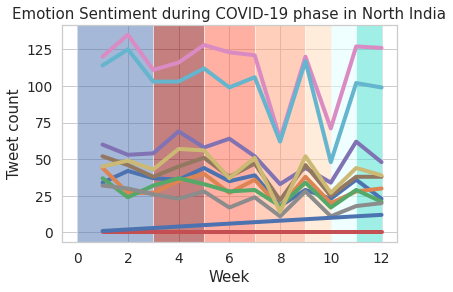

In [13]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

df=pd.DataFrame(emotions)
df.head()


for key in emotions.keys():
  plt.plot( 'week', key, data=df, linewidth=4,label = key)

plt.ylabel('Tweet count')
plt.xlabel('Week')
plt.title('Emotion Sentiment during COVID-19 phase in North India')
plt.axvspan(0, 3, facecolor='b', alpha=0.5)
plt.axvspan(3, 5, facecolor='darkred', alpha=0.5)
plt.axvspan(5, 7, facecolor='tomato', alpha=0.5)
plt.axvspan(7, 9, facecolor='lightsalmon', alpha=0.5)
plt.axvspan(9, 10, facecolor='peachpuff', alpha=0.5)
plt.axvspan(10, 11, facecolor='lightcyan', alpha=0.5)
plt.axvspan(11, 12, facecolor='turquoise', alpha=0.5)

d1 = mpatches.Patch(color='b', label='Pre Lockdown')
d2 = mpatches.Patch(color='darkred', label='Lockdown 1')
d3 = mpatches.Patch(color='tomato', label='Lockdown 2')
d4 = mpatches.Patch(color='lightsalmon', label='Lockdown 3')
d5 = mpatches.Patch(color='peachpuff', label='Lockdown 4')
d6 = mpatches.Patch(color='lightcyan', label='Unlock 1')
d7 = mpatches.Patch(color='lightcyan', label='Unlock 2')




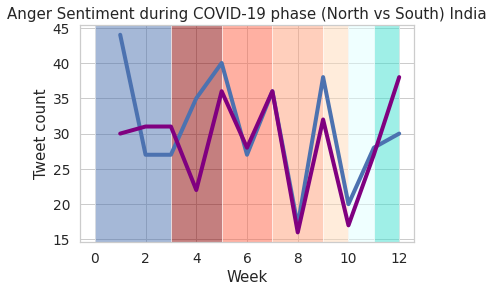

In [14]:
emo = {
    'north' : [],
    'south' : [],
    'week': []
}

emo['week'] = [*range(1,13)]
for file in range(len(weekfiles)):
  df = pd.read_csv(weekfiles[file])
  df = df[df.location.isin(['delhi', 'mumbai', 'kolkata'])]
  emo['north'].append(len(df[df['anger'] == 1]))
  df = pd.read_csv(weekfiles[file])
  df = df[df.location.isin(['bangalore', 'chennai', 'hyderabad'])]
  emo['south'].append(len(df[df['anger'] == 1]))
df=pd.DataFrame(emo)
plt.plot( 'week', 'north', data=df, linewidth=4)
plt.plot( 'week', 'south', data=df, linewidth=4,color='purple')
plt.ylabel('Tweet count')
plt.xlabel('Week')
plt.title('Anger Sentiment during COVID-19 phase (North vs South) India')
plt.axvspan(0, 3, facecolor='b', alpha=0.5)
plt.axvspan(3, 5, facecolor='darkred', alpha=0.5)
plt.axvspan(5, 7, facecolor='tomato', alpha=0.5)
plt.axvspan(7, 9, facecolor='lightsalmon', alpha=0.5)
plt.axvspan(9, 10, facecolor='peachpuff', alpha=0.5)
plt.axvspan(10, 11, facecolor='lightcyan', alpha=0.5)
plt.axvspan(11, 12, facecolor='turquoise', alpha=0.5)


In [ ]:


list_of_dataframes = []
for count in range(1,38):
    filename = "/content/drive/My Drive/sentimental/covidsentiment ("+str(count)+").csv"
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)
merged_df.to_csv("/content/drive/My Drive/sentimental/fulldataset.csv", index = False)


ParserError: ignored